In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(res_time, ground_data, key_data):
    result_x = []
    gold_x = []
    key_x = []

    result_y = []
    gold_y = []
    key_y = []

    for i in range(len(res_time)):
        result_x.append(res_time[i][11])
        result_y.append(res_time[i][3])
        gold_x.append(ground_data[i][11])
        gold_y.append(ground_data[i][3])
        
    for i in range(len(key_data)):
        key_x.append(key_data[i][1])
        key_y.append(key_data[i][2])
           
    return gold_x, gold_y, result_x, result_y, key_x, key_y

In [3]:
def plot_data(gold_data_x, gold_data_y, result_data_x, result_data_y, key_x, key_y):
    plt.scatter(gold_data_y, gold_data_x, s=0.1, c='red', label="gold")
    plt.scatter(result_data_y, result_data_x, s=0.1, c='green', label="result")
    plt.scatter(key_x, key_y, s=0.1, c='black', label="key frames")
    plt.title("Data")
    plt.legend()
    plt.show()

In [4]:
def plot_turn(data_x, data_y, turn_x, turn_y):
    plt.scatter(data_y, data_x, s=0.1, c='black')
    plt.scatter(turn_y, turn_x, c='red')
    plt.show()

In [5]:
def plot_one_data(data_x, data_y):
    plt.scatter(data_y, data_x, s=0.5, c='black')
    plt.show()

In [6]:
def find_turn(dataX, dataY, numberPoints):
    result = 0
    newX = []
    newY = []
    
    for i in range(numberPoints):
        newX.append(dataX[i])
        newY.append(dataY[i])
    
    plt.scatter(newY, newX, c='red')
    plt.show()
    return result

In [7]:
def find_square_triangle(x1,y1,x2,y2,x3,y3):
    return abs((x2-x1)*(y3-y1)-(x3-x1)*(y2-y1))/2

In [8]:
def find_max_square(dataX, dataY):
    maxS = 0.15    
    resultMaxVertex = []
    resultMaxSquare = []
    
    result = []
    j = 0
    
    for i in range(len(dataX) - 6):
        square = find_square_triangle(dataX[i], dataY[i], dataX[i+3], dataY[i+3], dataX[i+6], dataY[i+6])
        
        if maxS < square:
            resultMaxVertex.append(i + 3)
            resultMaxSquare.append(square)
            
            result.append([0] * 2)
            result[j][0] = i + 3
            result[j][1] = square
            j += 1
            
    fullResult = []
    j = 0
    start = 0
    for i in range(len(result) - 1):
        curr = result[i][0]
        if curr + 1 == result[i + 1][0] and start == 0:
            start = result[i][0]
            
        if curr + 1 != result[i + 1][0]:
            fullResult.append([0] * 2)
            fullResult[j][0] = (start + result[i][0])//2
            fullResult[j][1] = result[i][1]
            j += 1
            start = 0
    
    return fullResult

In [9]:
def writeDataFile(dataX, dataY, eps, nameFile):
    f = open(nameFile, 'w')
    
    for i in range(len(dataX)):
        f.write(str(dataX[i]) + " " + str(dataY[i]) + " " + str(eps[i]) + '\n')
    
    f.close()

In [10]:
def get_coord_turn(data_square, dataX, dataY):
    resX = []
    resY = []
    
    for i in range(len(data_square)):
        resX.append(dataX[data_square[i][0]])
        resY.append(dataY[data_square[i][0]])
        
    return resX, resY

In [11]:
def get_coord_one_turn(data_square, dataX, dataY, numberTurn, numberPoints):
    resDataX = []
    resDataY = []
        
    for i in range(numberPoints//2):
        resDataX.append(dataX[data_square[numberTurn][0]-i-1])
        resDataY.append(dataY[data_square[numberTurn][0]-i-1])
        
    resDataX.append(dataX[data_square[numberTurn][0]])
    resDataY.append(dataY[data_square[numberTurn][0]])
        
    for i in range(numberPoints//2):
        resDataX.append(dataX[data_square[numberTurn][0]+i+1])
        resDataY.append(dataY[data_square[numberTurn][0]+i+1])
    
    return resDataX, resDataY

In [12]:
def createEpsilon(mode, value, number):
    res = []    
    if mode == 0:
        res = [value for i in range(number)]
    return res

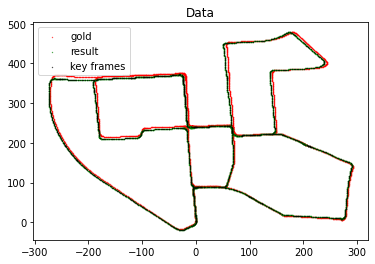

In [13]:
#Path to the times.txt in KITTI dataset
ground_time = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_gray\dataset\sequences\00\times.txt")
res_time = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\Examples\Results\Stereo\result_stereo_kitti_00.txt")
ground_data = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_poses\dataset\poses\00.txt")
key_frame_data = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\build\keyFrames00.txt")
gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y = load_data(res_time, ground_data, key_frame_data)
plot_data(gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y)

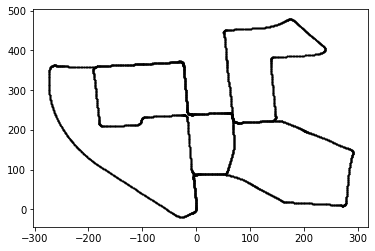

In [14]:
plot_one_data(result_data_x, result_data_y)

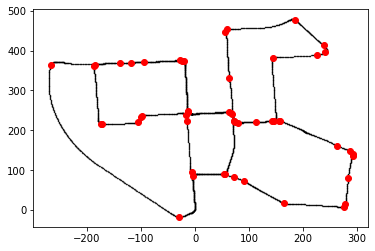

In [15]:
square = find_max_square(gold_data_x, gold_data_y)
sX,sY = get_coord_turn(square, gold_data_x, gold_data_y)
plot_turn(gold_data_x, gold_data_y, sX,sY)

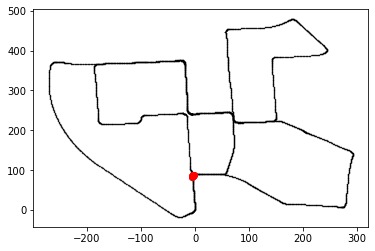

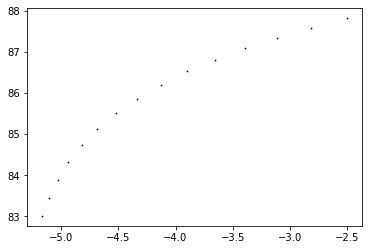

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [16]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 0, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
print(eps)
writeDataFile(turnX, turnY, eps, "gold_turn_00_0_15.txt")

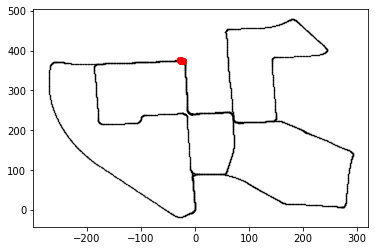

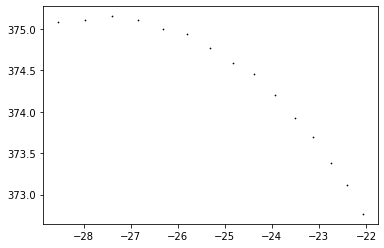

In [17]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 4, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
writeDataFile(turnX, turnY, eps, "gold_turn_00_4_15.txt")

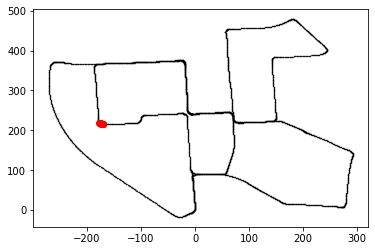

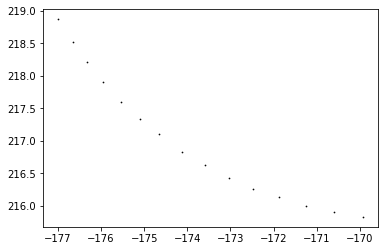

In [18]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 6, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
writeDataFile(turnX, turnY, eps, "gold_turn_00_6_15.txt")

In [19]:
##
##
##
##
##

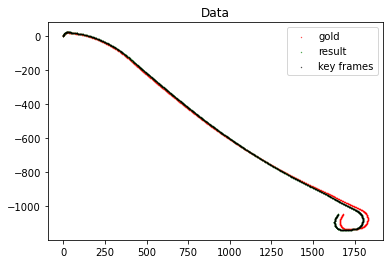

In [21]:
#Path to the times.txt in KITTI dataset
ground_time = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_gray\dataset\sequences\01\times.txt")
res_time = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\Examples\Results\Stereo\result_stereo_kitti_01.txt")
ground_data = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_poses\dataset\poses\01.txt")
key_frame_data = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\build\keyFrames01.txt")
gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y = load_data(res_time, ground_data, key_frame_data)
plot_data(gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y)

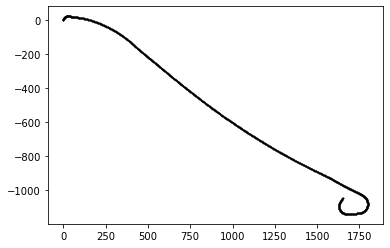

In [23]:
plot_one_data(result_data_x, result_data_y)

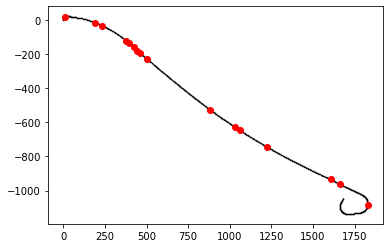

In [24]:
square = find_max_square(gold_data_x, gold_data_y)
sX,sY = get_coord_turn(square, gold_data_x, gold_data_y)
plot_turn(gold_data_x, gold_data_y, sX,sY)

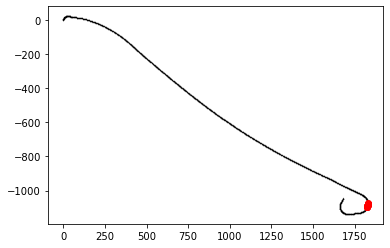

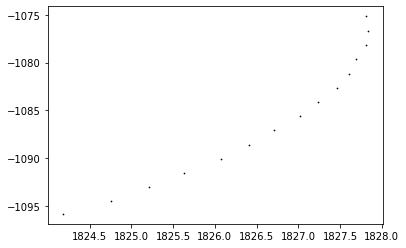

In [25]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 15, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
writeDataFile(turnX, turnY, eps, "gold_turn_01_15_15.txt")

In [26]:
##
##
##
##
##

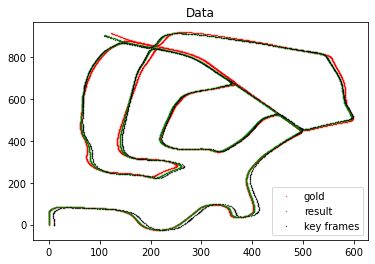

In [27]:
#Path to the times.txt in KITTI dataset
ground_time = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_gray\dataset\sequences\02\times.txt")
res_time = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\Examples\Results\Stereo\result_stereo_kitti_02.txt")
ground_data = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_poses\dataset\poses\02.txt")
key_frame_data = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\build\keyFrames02.txt")
gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y = load_data(res_time, ground_data, key_frame_data)
plot_data(gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y)

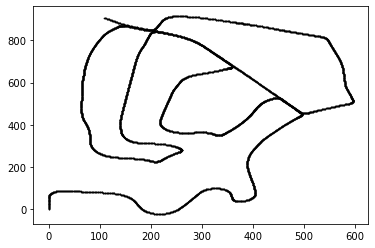

In [28]:
plot_one_data(result_data_x, result_data_y)

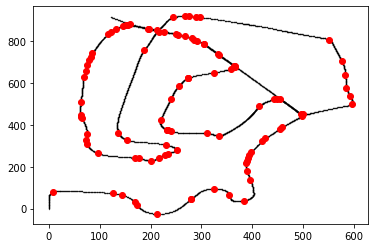

In [29]:
square = find_max_square(gold_data_x, gold_data_y)
sX,sY = get_coord_turn(square, gold_data_x, gold_data_y)
plot_turn(gold_data_x, gold_data_y, sX,sY)

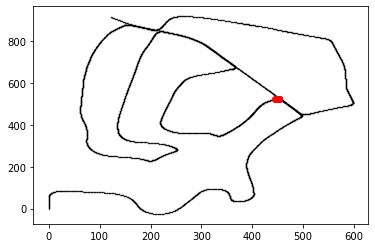

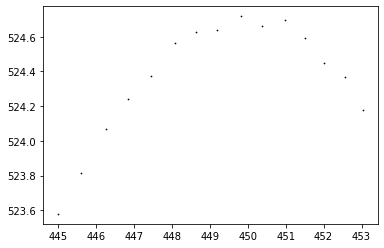

In [30]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 23, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
writeDataFile(turnX, turnY, eps, "gold_turn_02_23_15.txt")

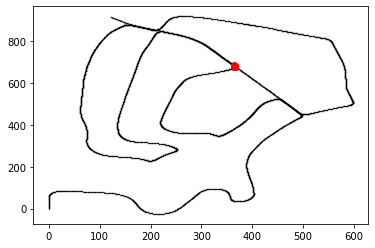

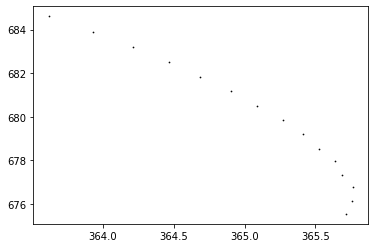

In [31]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 34, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
writeDataFile(turnX, turnY, eps, "gold_turn_02_34_15.txt")

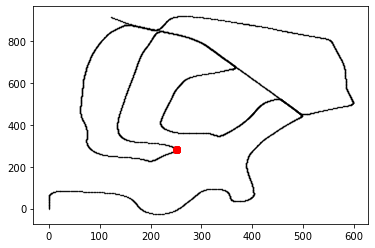

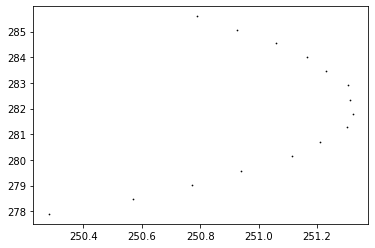

In [32]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 46, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
writeDataFile(turnX, turnY, eps, "gold_turn_02_46_15.txt")

In [33]:
##
##
##
##
##

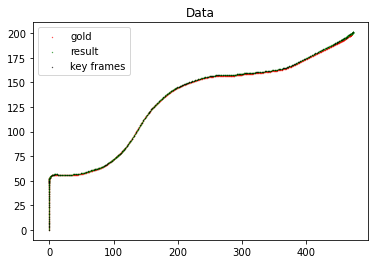

In [34]:
#Path to the times.txt in KITTI dataset
ground_time = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_gray\dataset\sequences\03\times.txt")
res_time = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\Examples\Results\Stereo\result_stereo_kitti_03.txt")
ground_data = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_poses\dataset\poses\03.txt")
key_frame_data = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\build\keyFrames03.txt")
gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y = load_data(res_time, ground_data, key_frame_data)
plot_data(gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y)

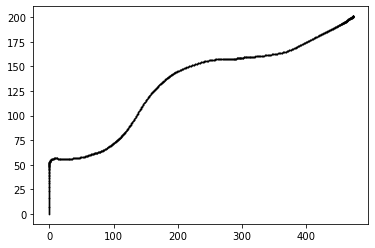

In [35]:
plot_one_data(result_data_x, result_data_y)

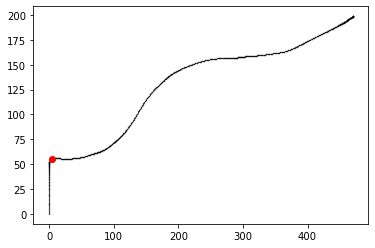

In [36]:
square = find_max_square(gold_data_x, gold_data_y)
sX,sY = get_coord_turn(square, gold_data_x, gold_data_y)
plot_turn(gold_data_x, gold_data_y, sX,sY)

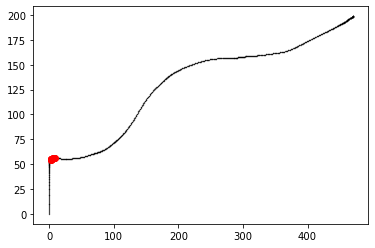

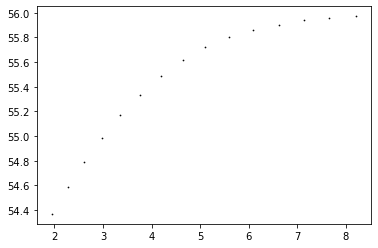

In [37]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 0, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
writeDataFile(turnX, turnY, eps, "gold_turn_03_00_15.txt")

In [47]:
##
##
##
##
##

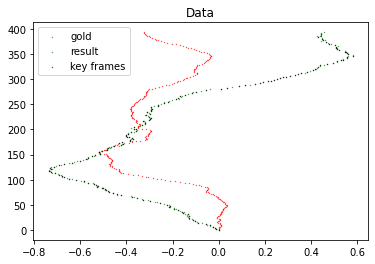

In [48]:
#Path to the times.txt in KITTI dataset
ground_time = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_gray\dataset\sequences\04\times.txt")
res_time = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\Examples\Results\Stereo\result_stereo_kitti_04.txt")
ground_data = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_poses\dataset\poses\04.txt")
key_frame_data = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\build\keyFrames04.txt")
gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y = load_data(res_time, ground_data, key_frame_data)
plot_data(gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y)

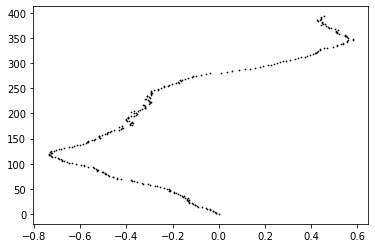

In [49]:
plot_one_data(result_data_x, result_data_y)

In [40]:
##
##
##
##
##

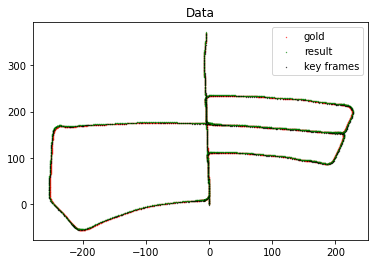

In [41]:
#Path to the times.txt in KITTI dataset
ground_time = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_gray\dataset\sequences\05\times.txt")
res_time = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\Examples\Results\Stereo\result_stereo_kitti_05.txt")
ground_data = np.loadtxt(r"D:\University\Diplom\datasets\KITTY\data_odometry_poses\dataset\poses\05.txt")
key_frame_data = np.loadtxt(r"D:\University\Diplom\my_code\orbslam-windows-master\build\keyFrames05.txt")
gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y = load_data(res_time, ground_data, key_frame_data)
plot_data(gold_data_x, gold_data_y, result_data_x, result_data_y, key_data_x, key_data_y)

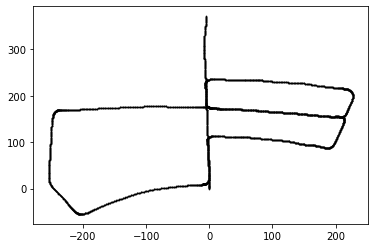

In [42]:
plot_one_data(result_data_x, result_data_y)

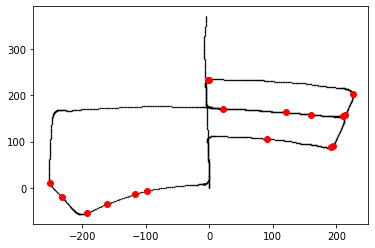

In [43]:
square = find_max_square(gold_data_x, gold_data_y)
sX,sY = get_coord_turn(square, gold_data_x, gold_data_y)
plot_turn(gold_data_x, gold_data_y, sX,sY)

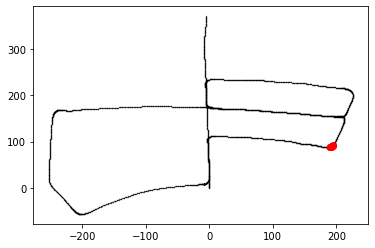

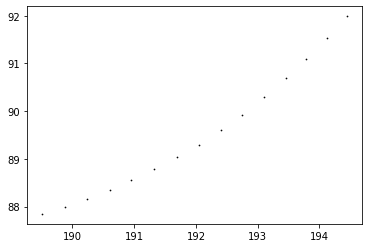

In [44]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 0, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
writeDataFile(turnX, turnY, eps, "gold_turn_05_0_15.txt")

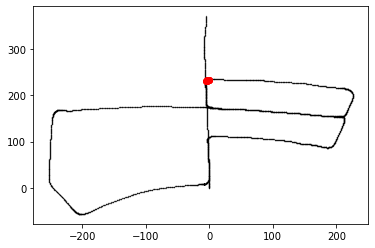

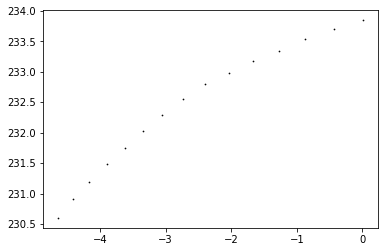

In [45]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 3, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
writeDataFile(turnX, turnY, eps, "gold_turn_05_3_15.txt")

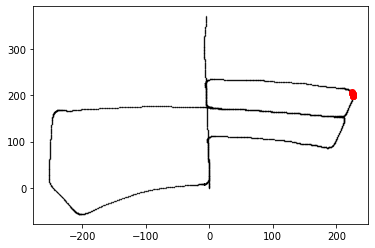

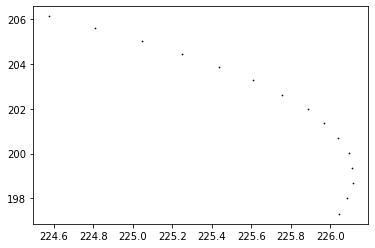

In [46]:
turnX, turnY = get_coord_one_turn(square, gold_data_x, gold_data_y, 6, 14)
plot_turn(gold_data_x, gold_data_y, turnX, turnY)
plot_one_data(turnX, turnY)

eps = createEpsilon(0, 1.0, len(turnX))
writeDataFile(turnX, turnY, eps, "gold_turn_05_6_15.txt")